In [34]:
# TODO
# Ajout du covid via correspondance des dates
# Création de graphe via plot express
# Réalisation de l'analyse MMM


# Imports

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data

In [52]:
# Create data frame
df = pd.read_csv("data/dataset_real.csv")


In [53]:
df


ordine_data  revenue  google_search_spent  google_performance_max_spent  \
0    2020-07-01  1878.71                93.04                          0.00   
1    2020-07-02  2057.76                81.20                          0.00   
2    2020-07-03  1930.55                69.40                          0.00   
3    2020-07-04   778.36                34.94                          0.00   
4    2020-07-05  1753.69                90.33                          0.00   
..          ...      ...                  ...                           ...   
591  2022-02-17  6061.37               347.75                        125.32   
592  2022-02-18  3722.15               258.10                         79.30   
593  2022-02-19  2670.47                92.04                          9.96   
594  2022-02-20  3385.87                86.37                         40.50   
595  2022-02-21   372.27                42.17                         22.04   

     fb_retargeting_spent  fb_prospecting_spent  google_organico  Sconti  
0                    0.00                  0.00                0       1  
1                    0.00                  0.00                0       1  
2                    0.00                  0.00                0       2  
3                    0.00                  0.00                0       0  
4                    0.00                  0.00                0       1  
..                    ...                   ...              ...     ...  
591                 19.96                 30.44             5003       9  
592                 20.31                 31.06             4696      14  
593                 23.16                 33.75             3058       8  
594                 19.90                 30.59             1398       3  
595                  1.33                  2.13                0       0  

[596 rows x 8 columns]

In [54]:
# Check basic statistics
df.describe()


revenue  google_search_spent  google_performance_max_spent  \
count    596.000000           596.000000                    596.000000   
mean    6391.668943           204.011393                     21.190017   
std     3857.523928           142.908749                     34.288787   
min       32.800000             0.000000                      0.000000   
25%     3628.725000            93.167500                      0.000000   
50%     5752.050000           177.655000                      0.000000   
75%     8287.240000           263.187500                     42.102500   
max    27815.430000           912.410000                    178.470000   

       fb_retargeting_spent  fb_prospecting_spent  google_organico      Sconti  
count            596.000000            596.000000       596.000000  596.000000  
mean               9.182970             19.015906      1464.112416   10.807047  
std               16.046709             25.997267      2543.398401   22.848894  
min                0.000000              0.000000         0.000000    0.000000  
25%                0.000000              0.000000         0.000000    0.000000  
50%                0.000000              0.000000         0.000000    2.000000  
75%               19.682500             32.190000      2974.500000   12.000000  
max              124.140000            135.470000      8836.000000  173.000000

In [55]:
# Check missing values
df.isna().sum()


ordine_data                     0
revenue                         0
google_search_spent             0
google_performance_max_spent    0
fb_retargeting_spent            0
fb_prospecting_spent            0
google_organico                 0
Sconti                          0
dtype: int64

In [56]:
# Check data types
df.dtypes


ordine_data                      object
revenue                         float64
google_search_spent             float64
google_performance_max_spent    float64
fb_retargeting_spent            float64
fb_prospecting_spent            float64
google_organico                   int64
Sconti                            int64
dtype: object

In [57]:
# Change date data type column from string to datetime
df["ordine_data"] = pd.to_datetime(df["ordine_data"])


In [58]:
# Check for years and days count in each year
df["ordine_data"].dt.year.value_counts()


2021    361
2020    183
2022     52
Name: ordine_data, dtype: int64

In [59]:
# Check if we only have 12 months in data
months_in_df = sorted(df["ordine_data"].dt.month.unique())
months_list = [month for month in range(1, 13)]
months_in_df == months_list


True

In [60]:
# Check if we only have 31 days in data
days_in_df = sorted(df["ordine_data"].dt.day.unique())
days_list = [day for day in range(1, 32)]
days_in_df == days_list


True

In [61]:
# Check correlation map
df.corr().style.background_gradient(cmap = "coolwarm")


We can see that 'Sconti,' which refers to discounts, is strongly correlated with revenues, which is quite logical and shows that we achieve a real increase in revenues through promotions.

It is worth noting that the second most impacting channel on revenues is Google search. However, we notice that Facebook does not have as much impact; it even has a negative impact on revenues.

Nevertheless, it is interesting to note that the increase in Google search expenses is correlated with Facebook expenses. Considering that spending on Google search can mainly increase due to higher search interest in the purchased keywords. Intrinsically, the Google search budget is linked to revenues, but it is worth noting that the Google search budget is linked to the Facebook budget.

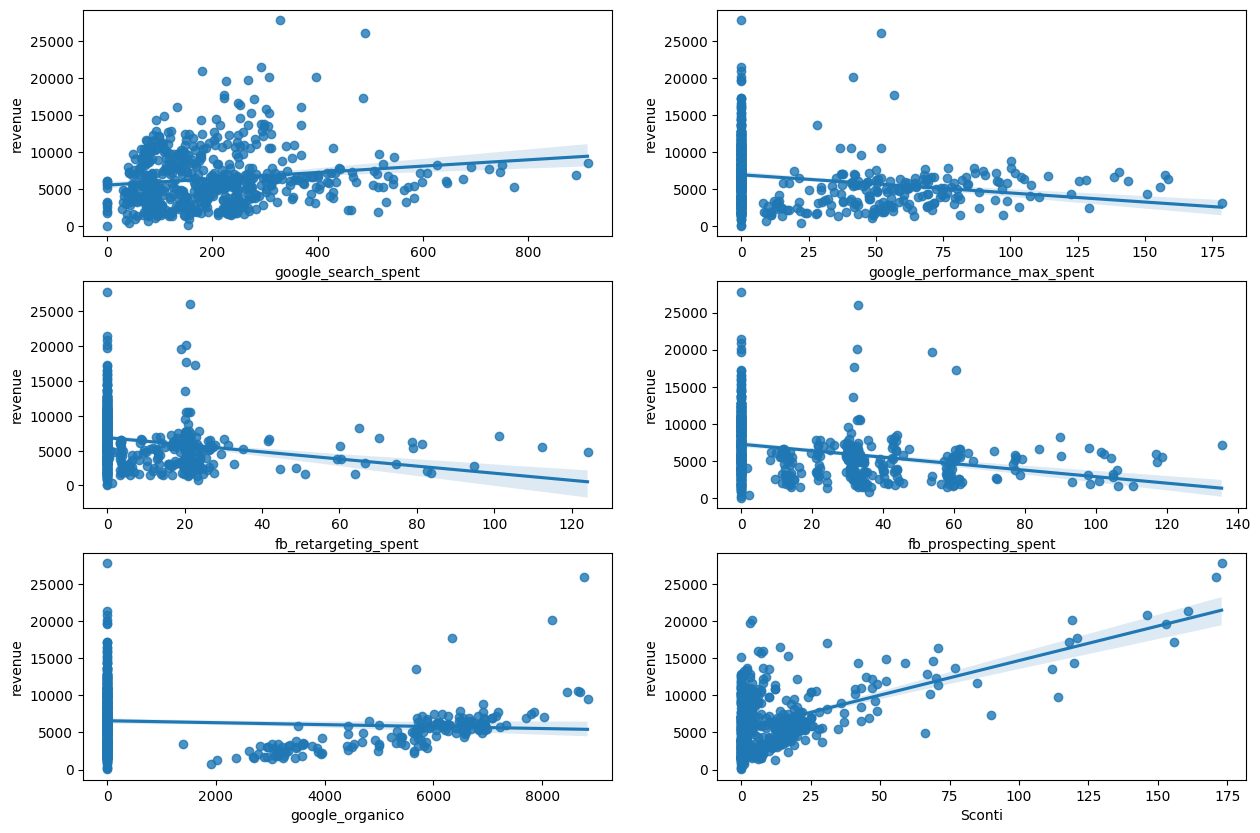

In [71]:
# Check data via regression plot
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.regplot(x = "google_search_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,2)
sns.regplot(x = "google_performance_max_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,3)
sns.regplot(x = "fb_retargeting_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,4)
sns.regplot(x = "fb_prospecting_spent", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,5)
sns.regplot(x = "google_organico", y = "revenue", data = df, ci = 95)
plt.subplot(3,2,6)
sns.regplot(x = "Sconti", y = "revenue", data = df, ci = 95);


Here we have the confirmation that 

In [72]:
fig = px.line(df, x = df["ordine_data"], y = df.columns)
fig.show()


We can see a really high increase in december 21 each year (2020 - 2021)